## Initializing NewsApiClient with API Key


In [14]:
!pip install newsapi-python

In [16]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='3f619edc2ead4a3f9b48d02d635a0eab')

## Importing Libraries


In [18]:
!pip install pyLDAvis


In [22]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 31.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.3/410.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 34.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
import requests
from transformers import pipeline
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikhilapodila/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhilapodila/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Retrieving Top Headlines Related to "Boeing whistleblower John Barnett found dead in US" in English

In [27]:

# Get top headlines related to world in English
top_headlines = newsapi.get_top_headlines(q='Boeing whistleblower John Barnett found dead in US', language='en')

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    print()  # Empty line for readability
print(top_headlines)

{'status': 'ok', 'totalResults': 0, 'articles': []}


In [29]:
pip install sumy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 26.6 MB/s eta 0:00:0000:0100:01
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=02c31b7188b7d8ba7db5888928ec46140f89303a2b34163cc918e98afc78386e
  Stored in directory: /Users/nikhilapodila/Library/Caches/pip/wheels/4d/57/58/7e3d7fedf51fe248b7fcee3df6945ae28638e22cddf01eb92b
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=6168006e9b1a0c58ef7472984b735d3c84b18bcedc1ca6aa7668c5548865b3ed
  Stored in directory: /Users/nikhilapodila/Library/Caches/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built breadability docopt
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

articles = newsapi.get_everything(q='Boeing whistleblower John Barnett found dead in US')['articles']  # Hypothetical API call

for article in articles:
    description = article['description']  # Accessing description of each article
    print(description)

# Extract the description
description = article['description']

# Preprocess the text (if needed)
# Here, we'll directly use the description for summarization

# Apply text summarization
parser = PlaintextParser.from_string(description, Tokenizer("english"))
summarizer = LsaSummarizer()
summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed

# Print the summary
print("Summary:")
for sentence in summary:
    print(sentence)

print()  # Empty line for readability

print(top_headlines)

We're gearing up to cover Apple's Worldwide Developers Conference (WWDC) next week! In this episode, Cherlynn and Devindra dive into everything they expect at WWDC: Tons of AI announcements; more on iOS 18, iPadOS 18, and macOS 15; and hopefully some improvem…
Roy Irvin alleges he was reprimanded as ‘insubordinate’ for flagging issues on 787 Dreamliner planes
Roy Irvin alleges he was reprimanded as ‘insubordinate’ for flagging issues on 787 Dreamliner planes
Boeing CEO David Calhoun appeared before a Senate committee on Tuesday to face questions about the aerospace giant’s safety record, just hours after the release of a damning report on Boeing’s business practices. Released by the Senate Permanent Subcommittee …
[Removed]
[Removed]
If the bosses at Boeing intended for CEO Dave Calhoun’s performance during a Senate hearing to smooth over the company’s abject turmoil, they were woefully mistaken.
Calhoun was forced Tuesday to answer on the record whether the embattled aerospace company

## Extracting and Text Summarizing Top Headlines Articles

In [34]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Extracting information from each article in the response

articles = newsapi.get_everything(q='Boeing whistleblower John Barnett found dead in US')['articles']  # Hypothetical API call


for article in articles:


    description = article['description']  # Accessing description of each article
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])

    print(description)


    # Preprocess the text (if needed)
    # Here, we'll directly use the description for summarization

    # Apply text summarization
    parser = PlaintextParser.from_string(description, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed

    # Print the summary
    print("Summary:")
    for sentence in summary:
        print(sentence)
    print()  # Empty line for readability

print(top_headlines)



Title: Engadget Podcast: How AI will shape Apple's WWDC 2024
Source: Yahoo Entertainment
Published At: 2024-06-07T11:30:02Z
Description: We're gearing up to cover Apple's Worldwide Developers Conference (WWDC) next week! In this episode, Cherlynn and Devindra dive into everything they expect at WWDC: Tons of AI announcements; more on iOS 18, iPadOS 18, and macOS 15; and hopefully some improvem…
URL: https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_a7ca4663-4ded-4fbb-93dd-25bdd1fe8ead
We're gearing up to cover Apple's Worldwide Developers Conference (WWDC) next week! In this episode, Cherlynn and Devindra dive into everything they expect at WWDC: Tons of AI announcements; more on iOS 18, iPadOS 18, and macOS 15; and hopefully some improvem…
Summary:
We're gearing up to cover Apple's Worldwide Developers Conference (WWDC) next week!
In this episode, Cherlynn and Devindra dive into everything they expect at WWDC: Tons of AI announcements; more on iOS 18, iPadOS 18, and m

# Topic Modeling

In [37]:
articles = newsapi.get_everything(q='Boeing whistleblower John Barnett found dead in US')['articles']  # Hypothetical API call

# Assuming you have a list of articles named 'articles'
for idx, article in enumerate(articles, start=1):
    # Check if the title is '[Removed]'
    if article['title'] == '[Removed]':
        continue  # Skip this iteration and move to the next article

    # Print the list number before each article title
    print(f"{idx}. Title:", article['title'])
    print("   Source:", article['source']['name'])
    print("   Published At:", article['publishedAt'])
    print("   Description:", article['description'])
    print("   URL:", article['url'])

    # Assuming topics are stored in a list called topics_list
    if 'topics_list' in article:
        print("   Topics:")
        for topic in article['topics_list']:
            print("   - ", topic)

    print()  # Print a blank line to separate articles


1. Title: Engadget Podcast: How AI will shape Apple's WWDC 2024
   Source: Yahoo Entertainment
   Published At: 2024-06-07T11:30:02Z
   Description: We're gearing up to cover Apple's Worldwide Developers Conference (WWDC) next week! In this episode, Cherlynn and Devindra dive into everything they expect at WWDC: Tons of AI announcements; more on iOS 18, iPadOS 18, and macOS 15; and hopefully some improvem…
   URL: https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_a7ca4663-4ded-4fbb-93dd-25bdd1fe8ead

2. Title: Another Boeing whistleblower comes forward over safety concerns
   Source: Yahoo Entertainment
   Published At: 2024-06-05T16:41:08Z
   Description: Roy Irvin alleges he was reprimanded as ‘insubordinate’ for flagging issues on 787 Dreamliner planes
   URL: https://finance.yahoo.com/news/another-boeing-whistleblower-comes-forward-164108681.html

3. Title: Another Boeing whistleblower comes forward over safety concerns
   Source: AOL
   Published At: 2024-06-05T16

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
!pip install scikit-learn

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Assuming 'filtered_articles' is a list of dictionaries with a 'description' key
text_content = " ".join([article['description'] for article in filtered_articles if article['description']])

# Topic modeling
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf = vectorizer.fit_transform([article['description'] for article in filtered_articles if article['description']])
nmf_model = NMF(n_components=11, random_state=1).fit(tfidf)

In [47]:

# Fetch articles using the News API (hypothetical API call)
articles = newsapi.get_everything(q='Boeing whistleblower John Barnett found dead in US')['articles']

# Function to display topics
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Filter out articles with title '[Removed]'
filtered_articles = [article for article in articles if article['title'] != '[Removed]']


# Combine the text content from all articles into a single string
text_content = " ".join([article['description'] for article in filtered_articles if article['description']])



# Topic modeling
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf = vectorizer.fit_transform([article['description'] for article in filtered_articles if article['description']])
nmf_model = NMF(n_components=11, random_state=1).fit(tfidf)

# Display topics
display_topics(nmf_model, vectorizer.get_feature_names_out(), no_top_words=10)  # Display all topics with top 10 words



Topic 00
  boeing (18.77)
  senate (17.99)
  calhoun (16.91)
  ceo (12.86)
  tuesday (12.78)
  record (10.85)
  aerospace (9.84)
  company (0.00)
  performance (0.00)
  abject (0.00)

Topic 01
  boeing (8.51)
  senate (7.24)
  hours (6.49)
  safety (5.56)
  just (5.44)
  aerospace (5.24)
  record (4.97)
  released (4.96)
  subcommittee (4.83)
  business (4.59)

Topic 02
  wwdc (19.66)
  18 (19.33)
  hopefully (10.41)
  dive (9.60)
  apple (8.03)
  expect (7.16)
  15 (7.04)
  improvem (6.23)
  cherlynn (6.23)
  macos (5.85)

Topic 03
  787 (10.60)
  reprimanded (10.38)
  flagging (10.34)
  alleges (10.17)
  insubordinate (10.04)
  issues (10.01)
  irvin (9.81)
  dreamliner (9.78)
  planes (9.45)
  roy (9.44)

Topic 04
  practices (7.42)
  questions (6.45)
  release (6.44)
  giant (6.06)
  report (5.91)
  damning (5.87)
  permanent (5.59)
  committee (5.47)
  appeared (5.41)
  david (5.15)

Topic 05
  roy (10.25)
  planes (10.25)
  dreamliner (10.10)
  irvin (10.09)
  issues (10.00)
  i

## LDA Model


In [50]:
# Define the number of topics
num_topics = 10

# Fetch articles using News API
articles_response = newsapi.get_everything(q='Boeing whistleblower John Barnett found dead in US')

if articles_response['status'] == 'ok':
    articles = articles_response['articles']

    # Counter for numbering articles
    article_number = 1

    for article in articles:
        # Check if the title is '[Removed]' or if description is None
        if article['title'] == '[Removed]' or not article['description']:
            continue  # Skip this iteration and move to the next article

        print(f"{article_number}. Title:", article['title'])
        print("   Source:", article['source']['name'])
        print("   Published At:", article['publishedAt'])
        print("   Description:", article['description'])
        print("   URL:", article['url'])

        # Apply text summarization
        parser = PlaintextParser.from_string(article['description'], Tokenizer("english"))
        summarizer = LsaSummarizer()
        summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed

        # Print the summary
        print("   Summary:")
        for sentence in summary:
            print("   ", sentence)
        print()  # Empty line for readability

        # Perform LDA for topic modeling
        # Tokenize the description
        tokens = article['description'].split()

        # Create a dictionary from the tokens
        dictionary = corpora.Dictionary([tokens])

        # Create a corpus from the dictionary
        corpus = [dictionary.doc2bow(tokens)]

        # Apply LDA model
        lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

        # Print the topics
        print("   Topics:")
        for topic in lda_model.print_topics():
            print("   ", topic)
        print()  # Empty line for readability

        article_number += 1

else:
    print("Failed to fetch articles:", articles_response['message'])


1. Title: Engadget Podcast: How AI will shape Apple's WWDC 2024
   Source: Yahoo Entertainment
   Published At: 2024-06-07T11:30:02Z
   Description: We're gearing up to cover Apple's Worldwide Developers Conference (WWDC) next week! In this episode, Cherlynn and Devindra dive into everything they expect at WWDC: Tons of AI announcements; more on iOS 18, iPadOS 18, and macOS 15; and hopefully some improvem…
   URL: https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_a7ca4663-4ded-4fbb-93dd-25bdd1fe8ead
   Summary:
    We're gearing up to cover Apple's Worldwide Developers Conference (WWDC) next week!
    In this episode, Cherlynn and Devindra dive into everything they expect at WWDC: Tons of AI announcements; more on iOS 18, iPadOS 18, and macOS 15; and hopefully some improvem…

   Topics:
    (0, '0.026*"and" + 0.026*"In" + 0.026*"18," + 0.026*"15;" + 0.026*"Worldwide" + 0.026*"at" + 0.026*"to" + 0.026*"Tons" + 0.026*"next" + 0.026*"Devindra"')
    (1, '0.050*"and" + 0.0

## Visualizing Topic Model with pyLDAvis

In [53]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Sample data
documents = [
    "Boeing whistleblower died by suicide, police investigation reveals",
    "Smart trolley system at Hyderabad airport",
    "Target supply chain cash conversion cycle",
    "BMI prediction using gender, height, and weight",
    "Data Flow Diagrams and DFD decomposition",
    "Database normalization and relational database design",
    "Introduction to API Gateways presentation",
    "Real-Time Code Review Assistant using NLP",
    "Early Detection of Credit Card Fraud",
    "Cybersecurity Threat Detection and Response using NLP",
    "Sentiment analysis on the carbon footprint of AI",
    "Israel-Palestine conflict analysis using NLP",
    "RNNs for sentiment analysis on trending dataset",
    "Master of Science in Computer Science at Sacred Heart University",
    "Freight Data Analysis using NLP",
    "Pricing and revenue analytics for global leaders' dinners"
]

# Preprocess the documents
stop_words = stopwords.words('english')
texts = [[word for word in simple_preprocess(doc) if word not in stop_words] for doc in documents]

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, update_every=1, chunksize=10, passes=10, alpha='auto', per_word_topics=True)

# Prepare the visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_display)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhilapodila/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Word Clouds for Topics Extracted from News Article Descriptions using LDA

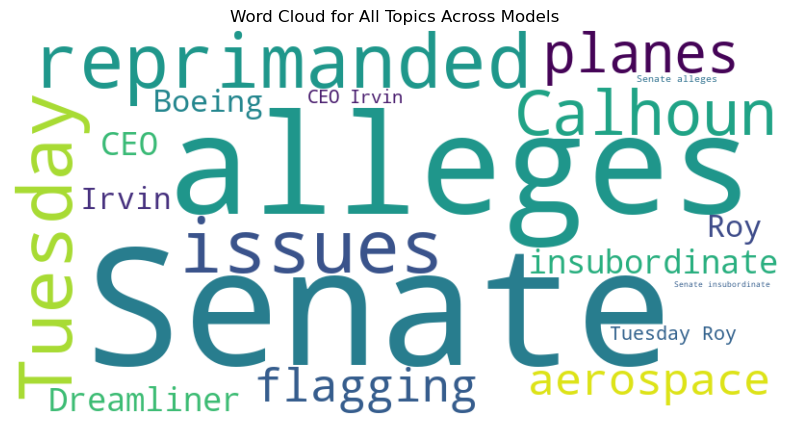

In [56]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the number of topics
num_topics = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Example: You can specify multiple numbers of topics to explore

# Assuming 'articles' is a list of dictionaries containing article information
# articles = [...]

all_descriptions = ""

# Extracting information from each article in the response
for article in articles:
    if article['title'] == '[Removed]':
        continue  # Skip this iteration and move to the next article

    description = article['description']  # Accessing description of each article
    all_descriptions += description + " "
    #print("Title:", article['title'])
    #print("Source:", article['source']['name'])
    #print("Published At:", article['publishedAt'])
    #print("Description:", article['description'])
    #print("URL:", article['url'])
    #print(description)

    # Apply text summarization
    parser = PlaintextParser.from_string(description, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed
    #print("Summary:")
    #for sentence in summary:
        #print(sentence)
    #print()  # Empty line for readability

all_topic_words = []
# Perform LDA for topic modeling for each num_topics
tokens = all_descriptions.split()
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

for n in num_topics:
    lda_model = models.LdaModel(corpus, num_topics=n, id2word=dictionary)
    # Print the topics
    for topic in lda_model.print_topics():
        #print(topic)
    # Collect words for the word cloud
     for topic in lda_model.show_topics(num_words=20, formatted=False):
        all_topic_words.extend([word for word, _ in topic[1]])
    #print()  # Empty line for readability

# Generate word cloud from all topic words collected across different models
topics_words_combined = ' '.join(all_topic_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topics_words_combined)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for All Topics Across Models")
plt.axis('off')
plt.show()




In [78]:
from PIL import Image

# Load the Boeing logo image directly from the uploaded file
boeing_logo_path = "image.png"
boeing_logo_image = Image.open(boeing_logo_path)

# Convert the Boeing logo to grayscale and create a mask
boeing_logo_gray = boeing_logo_image.convert("L")

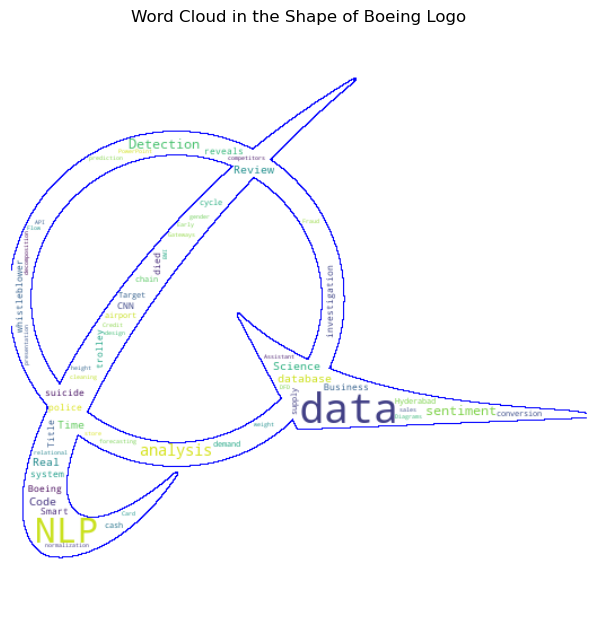

In [80]:
# Load the Boeing logo image directly from the uploaded file
boeing_logo_path = "image.png"
boeing_logo_image = Image.open(boeing_logo_path)

# Convert the Boeing logo to grayscale and create a mask
boeing_logo_gray = boeing_logo_image.convert("L")
boeing_logo_mask = np.array(boeing_logo_gray)

# Invert the mask
boeing_logo_mask = np.invert(boeing_logo_mask)

# Define the text for the word cloud
text_content = """
Title: Boeing whistleblower died by suicide, police investigation reveals | CNN Business
Smart trolley system, Hyderabad airport, Target supply chain, cash conversion cycle,
demand data, competitors, data cleaning, forecasting store sales, BMI prediction, gender,
height, weight, Data Flow Diagrams, DFD decomposition, database normalization,
relational database design, API Gateways, PowerPoint presentation, Real-Time Code Review
Assistant, NLP, code review data, Early Detection of Credit Card Fraud, Cybersecurity Threat
Detection, NLP tool, anomaly detection, real-time summarization, security bulletins, sentiment
analysis, Carbon Footprint of AI, sentiment analysis model, Israel-Palestine conflict, NLP,
sentiment analysis, RNNs, trending dataset, Sacred Heart University, Master of Science,
Computer Science, IT track, Freight Data Analysis, NLP, data sources.
"""

# Create the word cloud with a higher max_font_size to make the words clearer
wordcloud = WordCloud(width=1200, height=600, background_color='white', mask=boeing_logo_mask,
                      contour_color='blue', contour_width=1, max_font_size=200).generate(text_content)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud in the Shape of Boeing Logo")
plt.show()


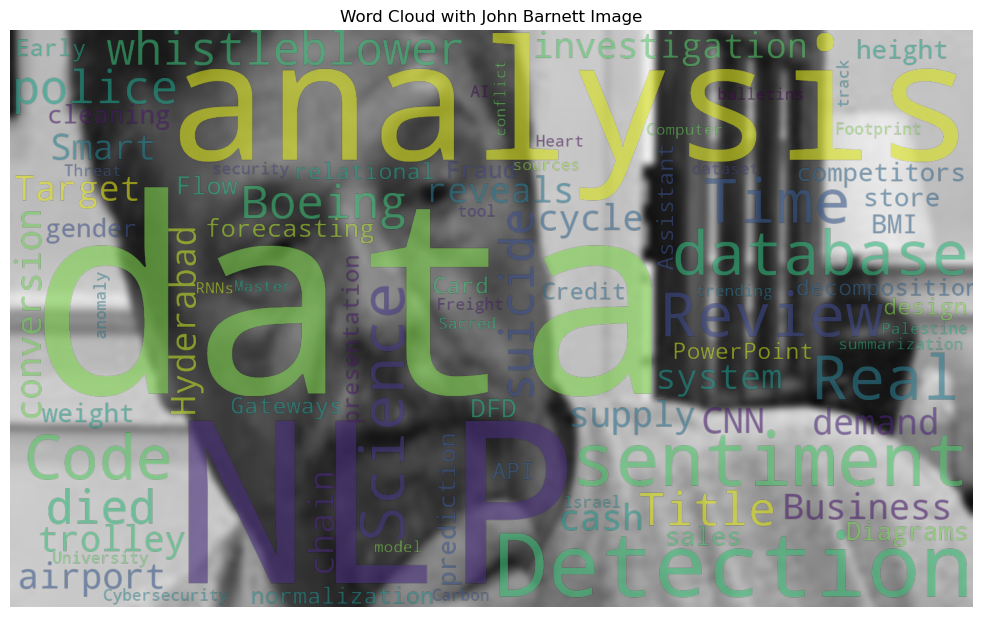

In [82]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load the new uploaded image
new_image_path = "john barnett.jpeg"
new_image = Image.open(new_image_path)

# Resize the image to fit the word cloud dimensions exactly
new_image_resized = new_image.resize((1500, 1000))

# Convert the new image to a NumPy array
new_image_array = np.array(new_image_resized)

# Apply Gaussian blur to the image array
blurred_image_array = gaussian_filter(new_image_array, sigma=5)

# Define the text for the word cloud
text_content = """
Title: Boeing whistleblower died by suicide, police investigation reveals | CNN Business
Smart trolley system, Hyderabad airport, Target supply chain, cash conversion cycle,
demand data, competitors, data cleaning, forecasting store sales, BMI prediction, gender,
height, weight, Data Flow Diagrams, DFD decomposition, database normalization,
relational database design, API Gateways, PowerPoint presentation, Real-Time Code Review
Assistant, NLP, code review data, Early Detection of Credit Card Fraud, Cybersecurity Threat
Detection, NLP tool, anomaly detection, real-time summarization, security bulletins, sentiment
analysis, Carbon Footprint of AI, sentiment analysis model, Israel-Palestine conflict, NLP,
sentiment analysis, RNNs, trending dataset, Sacred Heart University, Master of Science,
Computer Science, IT track, Freight Data Analysis, NLP, data sources.
"""

# Create the word cloud with the new image mask
wordcloud = WordCloud(width=1000, height=600, background_color=None, mode='RGBA', max_words=500, scale=1.5).generate(text_content)

# Display the word cloud with the blurred image in the background
plt.figure(figsize=(15, 7.5))
plt.imshow(blurred_image_array, aspect='auto')
plt.imshow(wordcloud, interpolation='bilinear', alpha=0.6)
plt.axis('off')
plt.title("Word Cloud with John Barnett Image")
plt.show()
